In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString, MultiPolygon
import descartes


In [2]:
def addToPlot(ax, geoms):
    actions={}
    actions['Point'] = lambda x: ax.plot([x.x], [x.y], 'ro')
    actions['LineString'] = lambda x: ax.plot(*np.array(x).T, color='green', linewidth=3, solid_capstyle='round')
    actions['Polygon'] = lambda x: ax.add_patch(descartes.PolygonPatch(x, fc='blue', alpha=0.5))
    actions['MultiPolygon'] = lambda x: addToPlot(ax, x.geoms)
    for g in geoms:
        t = g.geom_type
        actions[t](g)
    return ax
    
def plotGeom(geoms):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    addToPlot(ax, geoms)
    ax.axis('equal')
    plt.show()

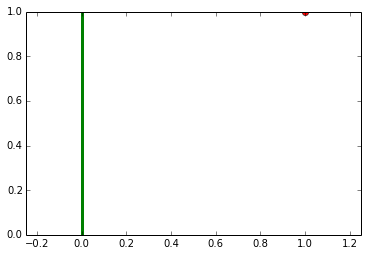

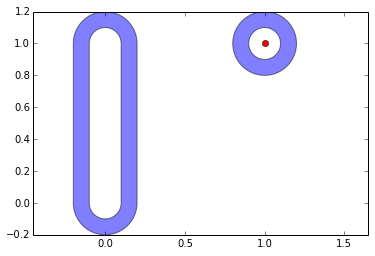

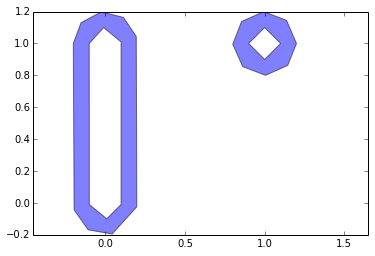

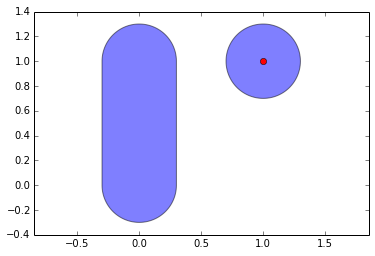

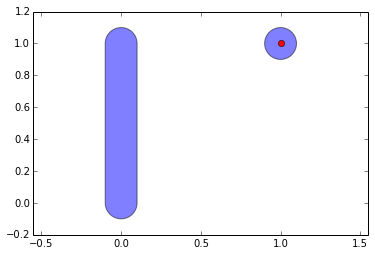

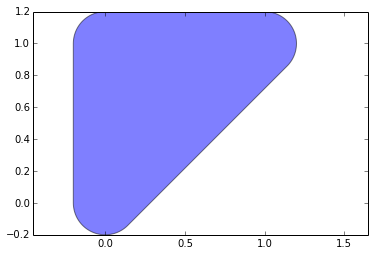

In [9]:
p = Point(1,1)
line = LineString(((0,0),(0,1)))

u = p.union(line).buffer(0.1)

diff = u.buffer(0.1).difference(u)
plotGeom([p, line])
plotGeom([p,diff])
plotGeom([diff.simplify(0.05)])
plotGeom([p,diff.buffer(0.1)])
plotGeom([p,diff.buffer(0.1).buffer(-0.2)])
plotGeom([diff.convex_hull])


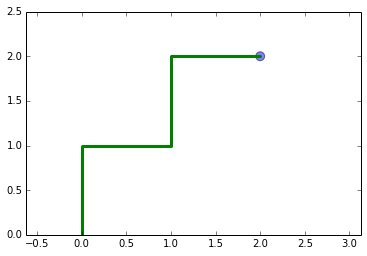

In [98]:
ll2 = LineString([(0, 0), (0, 1), (1,1), (1,2), (2,2)])
ip = l2.interpolate(5.2)
plotGeom([ll2, ip.buffer(0.05)])


2.1


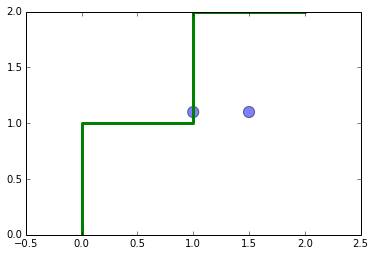

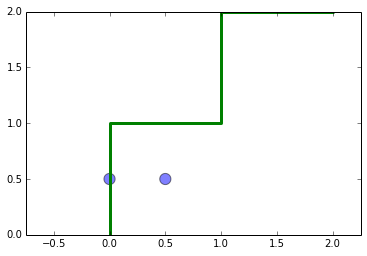

In [108]:
p3 = Point((1.5,1.1))
p4 = Point((0.5,0.5))
d = ll2.project(p3)
print d
plotGeom([ll2, p3.buffer(0.05), ll2.interpolate(d).buffer(0.05)])
plotGeom([ll2, p4.buffer(0.05), ll2.interpolate(ll2.project(p4)).buffer(0.05)])
